In [57]:
import pandas as pd
import numpy as np
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
from sklearn.metrics.pairwise import cosine_similarity
import gensim
import os
from gensim.models import Word2Vec, KeyedVectors
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary

In [3]:
data = pd.read_csv("C:/Users/kaami/abstracts.csv")

In [4]:
data

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,Ravi Sankar A.; Arunachalam S.; Gnanasekaran R.,"Ravi Sankar, Archan (58736003700); Arunachalam...",58736003700; 58736003800; 15133954900,A computational study to determine the role of...,2024,Journal of Molecular Graphics and Modelling,127,NaN,108680,NaN,...,NaN,JMGMF,38039786.0,English,J. Mol. Graph. Model.,Article,Final,NaN,Scopus,2-s2.0-85178379275
1,Krech A.; Ayzatsky M.; Barsuk S.; Bezshyyko O....,"Krech, A. (55991337200); Ayzatsky, M. (5877512...",55991337200; 58775125500; 58774981000; 1254601...,Radiation resistant optical components for hig...,2024,Nuclear Instruments and Methods in Physics Res...,1059,NaN,168997,NaN,...,NaN,NIMAE,NaN,English,Nucl Instrum Methods Phys Res Sect A,Article,Final,NaN,Scopus,2-s2.0-85180368245
2,Adam M.L.; Moses O.A.; Mailoa J.P.; Hsieh C.-Y...,"Adam, Mukhtar Lawan (57211981532); Moses, Oyaw...",57211981532; 57202454806; 36124979600; 5553116...,Navigating materials chemical space to discove...,2024,Energy Storage Materials,65,NaN,103090,NaN,...,NaN,NaN,NaN,English,Energy Storage Mater.,Article,Final,NaN,Scopus,2-s2.0-85180364046
3,Lee S.J.; Kim D.-M.,"Lee, So Jeong (57202901865); Kim, Dong-Myung (...",57202901865; 7409763678,Cell-free synthetic biology: Navigating the ne...,2024,Current Opinion in Systems Biology,37,NaN,100488,NaN,...,NaN,NaN,NaN,English,Curr. Opin. Syst.,Review,Final,NaN,Scopus,2-s2.0-85179609155
4,Pan J.; Wang Z.; Deng M.; Zhang J.; He H.; Wan...,"Pan, Jiana (58730360900); Wang, Zhengfeng (586...",58730360900; 58632144600; 58731589400; 5873239...,Construction of Janus structures on thin silk ...,2024,Journal of Colloid and Interface Science,656,NaN,NaN,587.0,...,NaN,JCISA,37996256.0,English,J. Colloid Interface Sci.,Article,Final,NaN,Scopus,2-s2.0-85178237227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Gong M.-Q.; Lai F.-F.; Chen J.-Z.; Li X.-H.; C...,"Gong, Meng-qi (58582387200); Lai, Fei-fan (572...",58582387200; 57217864780; 56949867800; 5719523...,"Traditional uses, phytochemistry, pharmacology...",2024,Journal of Ethnopharmacology,319,NaN,117128,NaN,...,NaN,JOETD,37689324.0,English,J. Ethnopharmacol.,Review,Final,NaN,Scopus,2-s2.0-85171332126
196,Marini G.; Marchese G.; Profeta G.; Sjakste J....,"Marini, Giovanni (57211902060); Marchese, Gugl...",57211902060; 58594409000; 8051937400; 66032756...,EPIq: An open-source software for the calculat...,2024,Computer Physics Communications,295,NaN,108950,NaN,...,NaN,CPHCB,NaN,English,Comput Phys Commun,Article,Final,All Open Access; Green Open Access; Hybrid Gol...,Scopus,2-s2.0-85174812925
197,Wu Q.; Sun Y.; Luo Z.; Li X.; Wen Y.; Shi Y.; ...,"Wu, Qiuju (58234902600); Sun, Yijie (582046922...",58234902600; 58204692200; 58718783200; 5802400...,Application and development of zero-valent iro...,2024,Environmental Research,241,NaN,117659,NaN,...,NaN,ENVRA,37980989.0,English,Environ. Res.,Review,Final,NaN,Scopus,2-s2.0-85177782645
198,Liu J.; Yang X.; Zhang Z.; Liu M.,"Liu, Jiahao (58141723700); Yang, Xiufeng (3607...",58141723700; 36071041600; 57194215254; 7406297665,A massive MPI parallel framework of smoothed p...,2024,Computer Physics Communications,295,NaN,108970,NaN,...,NaN,CPHCB,NaN,English,Comput Phys Commun,Article,Final,NaN,Scopus,2-s2.0-85174614361


In [5]:
data.drop(['Authors', 'Author(s) ID',
       'Source title', 'Volume', 'Issue', 'Art. No.', 'Page start', 'Page end',
       'Page count', 'Cited by', 'DOI', 'Link', 
       'Authors with affiliations',  'Author Keywords',
       'Index Keywords', 'Tradenames', 'Manufacturers',
       'Correspondence Address', 'Editors', 'ISSN', 'ISBN',
       'CODEN', 'PubMed ID', 
       'Abbreviated Source Title', 'Document Type', 'Publication Stage',
       'Open Access', 'Source', 'EID'], axis = 1, inplace = True)

In [6]:
data.columns

Index(['Author full names', 'Title', 'Year', 'Affiliations', 'Abstract',
       'Publisher', 'Language of Original Document'],
      dtype='object')

In [7]:
data.head()

,Author full names,Title,Year,Affiliations,Abstract,Publisher,Language of Original Document
0,"Ravi Sankar, Archan (58736003700); Arunachalam...",A computational study to determine the role of...,2024,"Vellore Institute of Technology, Chennai, India",A detailed investigation of the σ-hole on the ...,Elsevier Inc.,English
1,"Krech, A. (55991337200); Ayzatsky, M. (5877512...",Radiation resistant optical components for hig...,2024,"Institute for Scintillation Materials, NAS of ...",New detectors for future high-energy physics e...,Elsevier B.V.,English
2,"Adam, Mukhtar Lawan (57211981532); Moses, Oyaw...",Navigating materials chemical space to discove...,2024,"Center for Intelligent and Biomimetic Systems,...",Investigating the role of electrodes' physioch...,Elsevier B.V.,English
3,"Lee, So Jeong (57202901865); Kim, Dong-Myung (...",Cell-free synthetic biology: Navigating the ne...,2024,Department of Chemical Engineering and Applied...,Cell-free synthetic biology is swiftly progres...,Elsevier Ltd,English
4,"Pan, Jiana (58730360900); Wang, Zhengfeng (586...",Construction of Janus structures on thin silk ...,2024,School of Materials Science and Engineering an...,Owing to their small fiber diameter (10–15 μm)...,Academic Press Inc.,English


In [8]:
data['Abstract'][0]

'A detailed investigation of the σ-hole on the halogen atom present in the nido-heteroboranes is made by employing quantum mechanical methods. The bromide and the hydroxyl groups are incorporated in the exo-substituents of the nido-boranes. The potential of the bromide σ-hole was compared to that of electrostatic potential of hydroxyl group counterpart. The presence of a carbon atom vertex, in a different position of a system, influences the σ-hole and hence its binding abilities. Bromide substituted nido-carboranes have less potential and hence weaker binding ability compared to their closo-counterparts. Binding affinity with aliphatic is found to be more compared to that of aromatic system. The presence of solvent dampened the electrostatic interactions. Apart from the neutral system, the binding capabilities of charged nido-heteroboranes were also studied. The results of this study will be further useful for several applications viz., crystal engineering, drug designing (Pharmaceuti

In [9]:
data['Abstract'] = data['Abstract'].str.lower()

In [10]:
data['Abstract']

0      a detailed investigation of the σ-hole on the ...
1      new detectors for future high-energy physics e...
2      investigating the role of electrodes' physioch...
3      cell-free synthetic biology is swiftly progres...
4      owing to their small fiber diameter (10–15 μm)...
                             ...                        
195    ethnopharmacological relevance: gastrodia elat...
196    epiq (electron-phonon wannier interpolation ov...
197    zero-valent iron (zvi)-based materials are amo...
198    the dynamic failure process of structures unde...
199    ethnopharmacological relevance: transcatheter ...
Name: Abstract, Length: 200, dtype: object

In [11]:
exclude = string.punctuation
def remove_pun(text):
    for i in exclude:
        text = text.replace(i, "")
        return text

In [12]:
data['Abstract']=data['Abstract'].apply(remove_pun)

In [13]:
data['Abstract'][0]

'a detailed investigation of the σ-hole on the halogen atom present in the nido-heteroboranes is made by employing quantum mechanical methods. the bromide and the hydroxyl groups are incorporated in the exo-substituents of the nido-boranes. the potential of the bromide σ-hole was compared to that of electrostatic potential of hydroxyl group counterpart. the presence of a carbon atom vertex, in a different position of a system, influences the σ-hole and hence its binding abilities. bromide substituted nido-carboranes have less potential and hence weaker binding ability compared to their closo-counterparts. binding affinity with aliphatic is found to be more compared to that of aromatic system. the presence of solvent dampened the electrostatic interactions. apart from the neutral system, the binding capabilities of charged nido-heteroboranes were also studied. the results of this study will be further useful for several applications viz., crystal engineering, drug designing (pharmaceuti

In [15]:
# Function to remove stop words
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

# Apply stop words removal to DataFrame
data['Abstract'] = data['Abstract'].apply(remove_stopwords)

print(data)

                                     Author full names  \
0    Ravi Sankar, Archan (58736003700); Arunachalam...   
1    Krech, A. (55991337200); Ayzatsky, M. (5877512...   
2    Adam, Mukhtar Lawan (57211981532); Moses, Oyaw...   
3    Lee, So Jeong (57202901865); Kim, Dong-Myung (...   
4    Pan, Jiana (58730360900); Wang, Zhengfeng (586...   
..                                                 ...   
195  Gong, Meng-qi (58582387200); Lai, Fei-fan (572...   
196  Marini, Giovanni (57211902060); Marchese, Gugl...   
197  Wu, Qiuju (58234902600); Sun, Yijie (582046922...   
198  Liu, Jiahao (58141723700); Yang, Xiufeng (3607...   
199  Wang, Yuyao (58565847600); Lin, Wanfu (5697843...   

                                                 Title  Year  \
0    A computational study to determine the role of...  2024   
1    Radiation resistant optical components for hig...  2024   
2    Navigating materials chemical space to discove...  2024   
3    Cell-free synthetic biology: Navigating th

In [16]:
data["Abstract"]=data["Abstract"].str.replace('elsevier','')

In [17]:
data['Abstract'][0]

'detailed investigation σ-hole halogen atom present nido-heteroboranes made employing quantum mechanical methods . bromide hydroxyl groups incorporated exo-substituents nido-boranes . potential bromide σ-hole compared electrostatic potential hydroxyl group counterpart . presence carbon atom vertex , different position system , influences σ-hole hence binding abilities . bromide substituted nido-carboranes less potential hence weaker binding ability compared closo-counterparts . binding affinity aliphatic found compared aromatic system . presence solvent dampened electrostatic interactions . apart neutral system , binding capabilities charged nido-heteroboranes also studied . results study useful several applications viz. , crystal engineering , drug designing ( pharmaceuticals ) , medicine , material science , energy storage devices , etc . © 2023  inc .'

In [18]:
def clean_text(text):
    # Remove specific characters using regex
    cleaned_text = re.sub(r'[0-9,().%©:;\-_"\'‘’]', '', text)
    return cleaned_text



In [19]:
data["Abstract"] = data["Abstract"].apply(clean_text)

In [20]:
data["Abstract"][0]

'detailed investigation σhole halogen atom present nidoheteroboranes made employing quantum mechanical methods  bromide hydroxyl groups incorporated exosubstituents nidoboranes  potential bromide σhole compared electrostatic potential hydroxyl group counterpart  presence carbon atom vertex  different position system  influences σhole hence binding abilities  bromide substituted nidocarboranes less potential hence weaker binding ability compared closocounterparts  binding affinity aliphatic found compared aromatic system  presence solvent dampened electrostatic interactions  apart neutral system  binding capabilities charged nidoheteroboranes also studied  results study useful several applications viz  crystal engineering  drug designing  pharmaceuticals   medicine  material science  energy storage devices  etc     inc '

In [21]:
# Function to remove stop words
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

# Apply stop words removal to DataFrame
data['Abstract'] = data['Abstract'].apply(remove_stopwords)

In [22]:
data["Abstract"][0]

'detailed investigation σhole halogen atom present nidoheteroboranes made employing quantum mechanical methods bromide hydroxyl groups incorporated exosubstituents nidoboranes potential bromide σhole compared electrostatic potential hydroxyl group counterpart presence carbon atom vertex different position system influences σhole hence binding abilities bromide substituted nidocarboranes less potential hence weaker binding ability compared closocounterparts binding affinity aliphatic found compared aromatic system presence solvent dampened electrostatic interactions apart neutral system binding capabilities charged nidoheteroboranes also studied results study useful several applications viz crystal engineering drug designing pharmaceuticals medicine material science energy storage devices etc inc'

In [16]:
print("Basic Statistics:")
print("Number of abstracts:", len(data))
print("Average length of abstracts:", data['Abstract'].apply(len).mean())
print("Minimum length of abstracts:", data['Abstract'].apply(len).min())
print("Maximum length of abstracts:", data['Abstract'].apply(len).max())

Basic Statistics:
Number of abstracts: 200
Average length of abstracts: 1700.79
Minimum length of abstracts: 23
Maximum length of abstracts: 5669


In [72]:
#Abstract with minimum number of words
min_length_idx = data['Abstract'].apply(len).idxmin()
min_length_abstract = data.loc[min_length_idx, 'Abstract']

print("Abstract with Minimum Length:")
print(min_length_abstract)

Abstract with Minimum Length:
[ abstract available ]


In [47]:
data['word_count'] = data['Abstract'].apply(lambda x: len(x.split()))

# Find the row with the abstract having the minimum number of words
min_word_count_idx = data['word_count'].idxmin()
min_word_count_abstract = data.loc[min_word_count_idx, 'Abstract']

print("Abstract with Minimum Number of Words:")
print(min_word_count_abstract)

Abstract with Minimum Number of Words:
[ abstract available ]


In [48]:
min_length_idx = data['Abstract'].apply(len).idxmin()

print("Index of Abstract with Minimum Length:", min_length_idx)

Index of Abstract with Minimum Length: 99


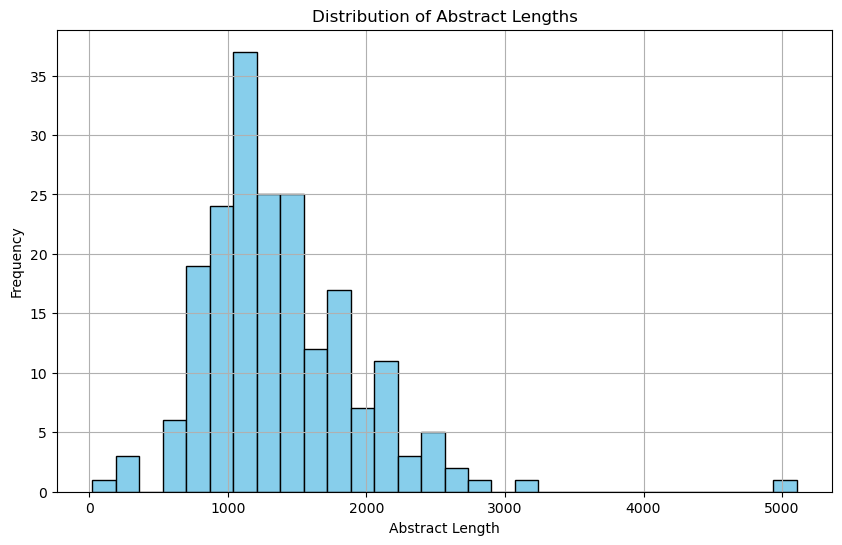

In [23]:
abstract_lengths = data['Abstract'].apply(len)

# Plot histogram of abstract lengths
plt.figure(figsize=(10, 6))
plt.hist(abstract_lengths, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Abstract Lengths')
plt.xlabel('Abstract Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


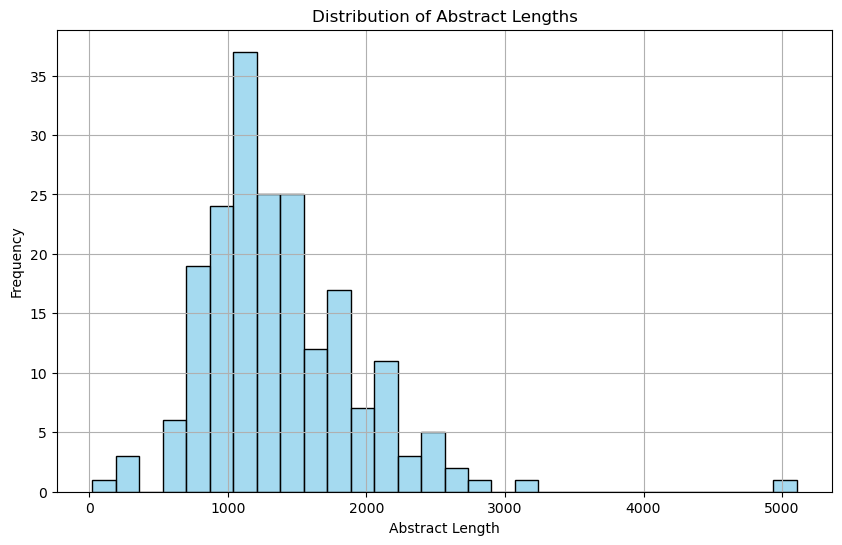

In [24]:
# Plot histogram of abstract lengths using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(abstract_lengths, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Abstract Lengths')
plt.xlabel('Abstract Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


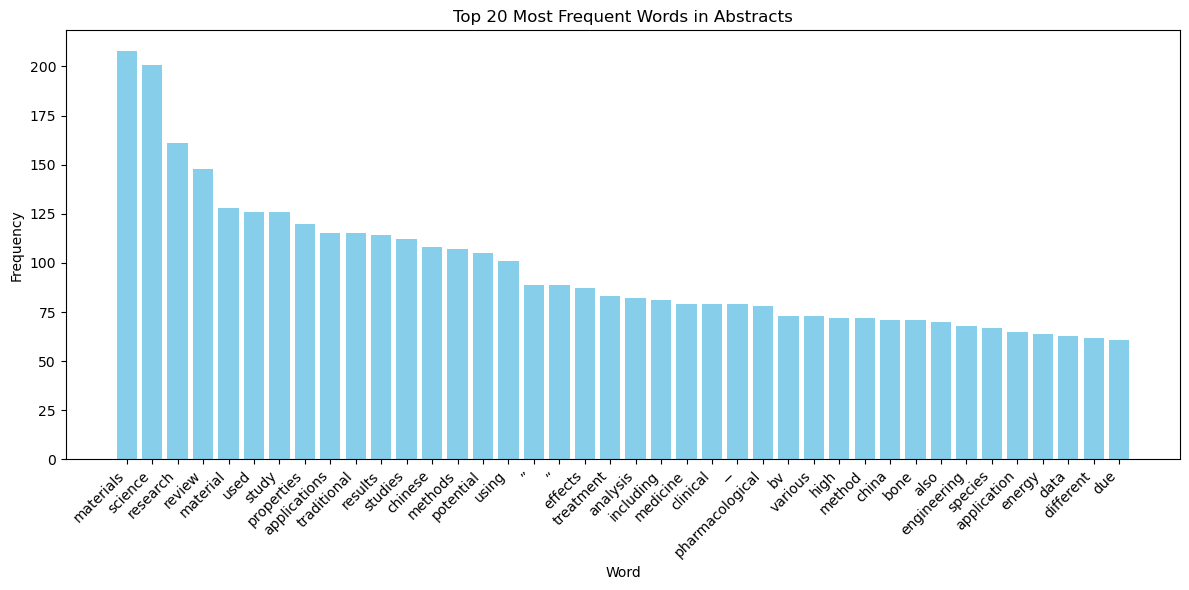

In [25]:
# Concatenate all abstracts into a single string
all_abstracts = ' '.join(data['Abstract'])

# Tokenize the text into words
words = all_abstracts.split()

# Count the frequency of each word
word_freq = Counter(words)

# Convert the Counter object to a pandas DataFrame
word_freq_df = pd.DataFrame.from_dict(word_freq, orient='index', columns=['frequency'])
word_freq_df.reset_index(inplace=True)
word_freq_df.rename(columns={'index': 'word'}, inplace=True)

# Sort the DataFrame by frequency in descending order
word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False)

# Plot the top 20 most frequent words
plt.figure(figsize=(12, 6))
plt.bar(word_freq_df['word'][:40], word_freq_df['frequency'][:40], color='skyblue')
plt.title('Top 20 Most Frequent Words in Abstracts')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [26]:
abstracts = data['Abstract'].tolist()

# Initialize CountVectorizer to extract bi-grams
vectorizer = CountVectorizer(ngram_range=(2, 2))

# Fit and transform the abstracts
X = vectorizer.fit_transform(abstracts)

# Get the vocabulary (bi-grams) and their frequencies
bi_grams = vectorizer.get_feature_names()
bi_gram_freq = X.sum(axis=0)

# Create a DataFrame to store bi-grams and their frequencies
bi_gram_df = pd.DataFrame(bi_gram_freq, columns=bi_grams)
bi_gram_df = bi_gram_df.transpose()
bi_gram_df.columns = ['frequency']

# Sort the DataFrame by frequency in descending order
bi_gram_df = bi_gram_df.sort_values(by='frequency', ascending=False)

# Display the top 10 common bi-grams
print("Top 10 Common Bi-Grams:")
print(bi_gram_df.head(20))


Top 10 Common Bi-Grams:
                                frequency
web science                            49
materials methods                      44
chinese medicine                       40
ethnopharmacological relevance         39
traditional chinese                    36
materials science                      35
traditional uses                       30
tissue engineering                     25
aim review                             24
material science                       24
google scholar                         24
active ingredients                     20
pharmacological activities             19
aim study                              18
smd ci                                 17
pubmed web                             17
quality control                        15
medicinal plants                       15
bone tissue                            15
pharmacological effects                14


C:\Users\kaami\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [27]:
#Topic models with LDA and tfIdf 
abstracts = data['Abstract'].tolist()

# Initialize TfidfVectorizer to convert text to TF-IDF matrix
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

# Fit and transform the abstracts
X_tfidf = tfidf_vectorizer.fit_transform(abstracts)

# Initialize LDA with 10 topics
lda = LatentDirichletAllocation(n_components=10, random_state=42)

# Fit LDA to the TF-IDF matrix
lda.fit(X_tfidf)

# Display the top 10 words for each topic
feature_names = tfidf_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx + 1}:")
    top_words_idx = topic.argsort()[:-11:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(top_words)
    print()


Topic 1:
['species', 'plants', 'pharmacological', 'medicinal', 'uses', 'activities', 'plant', 'genus', 'traditional', 'antiinflammatory']

Topic 2:
['air', 'gun', 'genetic', 'cof', 'dependency', 'numerical', 'lattice', 'scheme', 'pdt', 'wt']

Topic 3:
['polarity', 'heat', 'pt', 'oh', 'scorzonera', 'tangchong', 'nv', 'min', 'complexes', 'atoms']

Topic 4:
['material', 'research', 'materials', 'applications', 'properties', 'review', 'science', 'study', 'potential', 'method']

Topic 5:
['pifir', 'koreanum', 'ggg', 'presented', 'toxicodendron', 'original', 'gtg', 'cough', 'trqi', 'wm']

Topic 6:
['maglev', 'model', 'requirements', 'defect', 'angle', 'proton', 'pf', 'values', 'crack', 'incontinence']

Topic 7:
['printing', 'film', 'storage', 'hericium', 'ygj', 'membrane', 'optical', 'actinidia', 'alginates', 'electrode']

Topic 8:
['nonlinear', 'electrochemical', 'medium', 'dataset', 'shape', 'core', 'electrode', 'scanning', 'signaling', 'experimental']

Topic 9:
['food', 'eating', 'availab

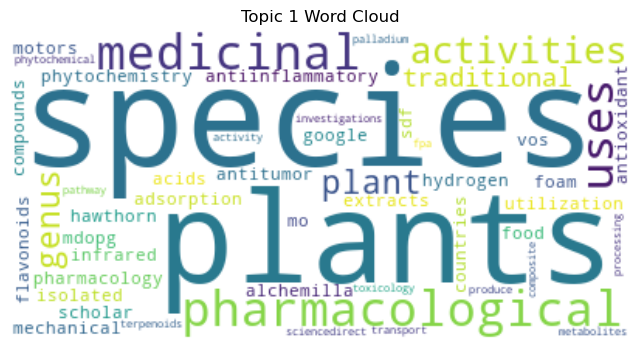

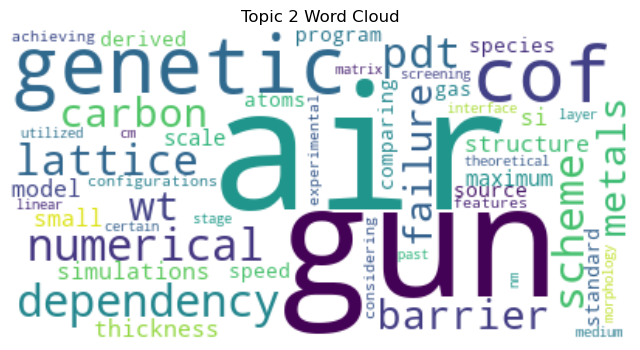

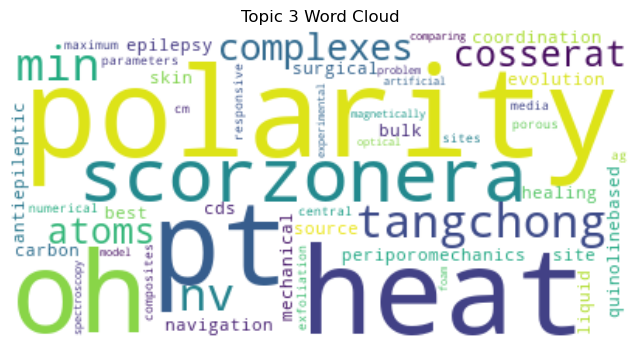

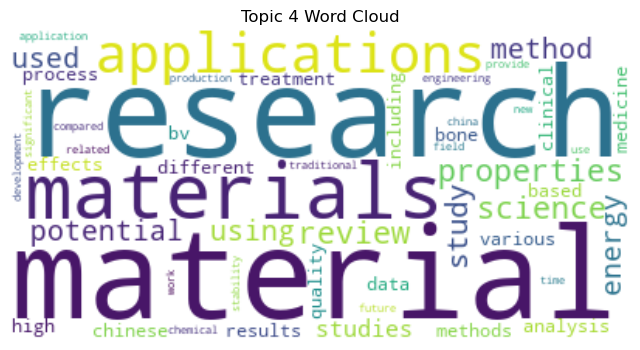

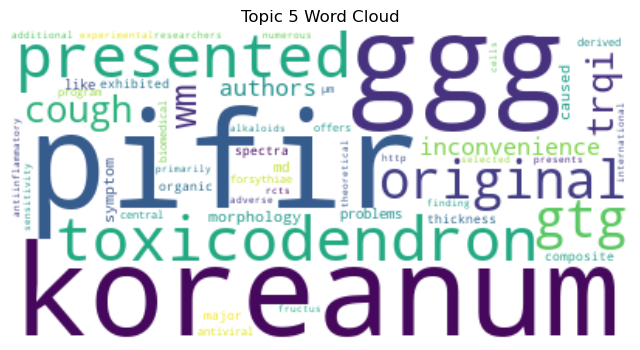

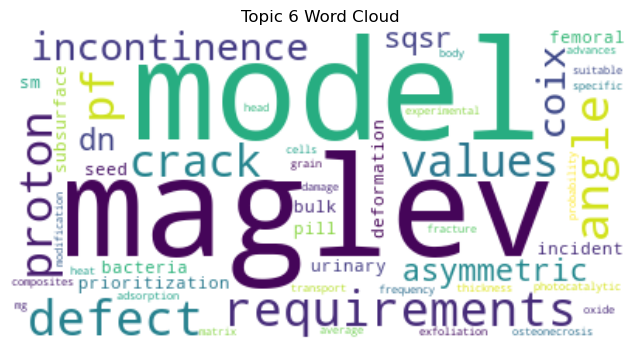

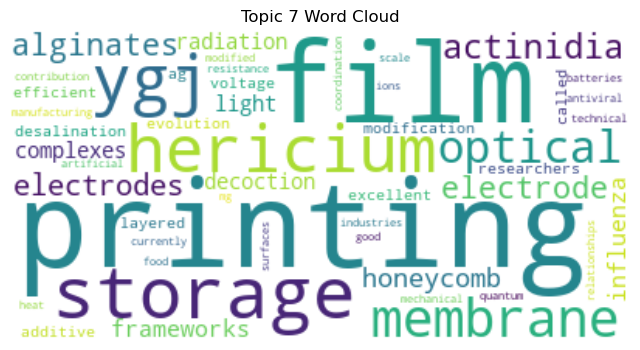

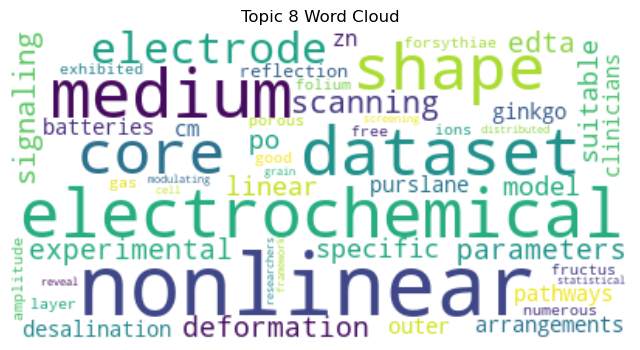

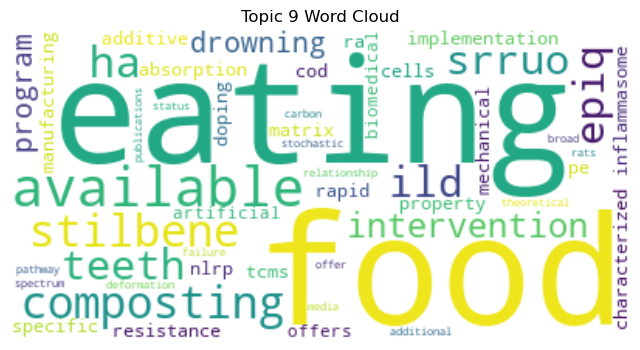

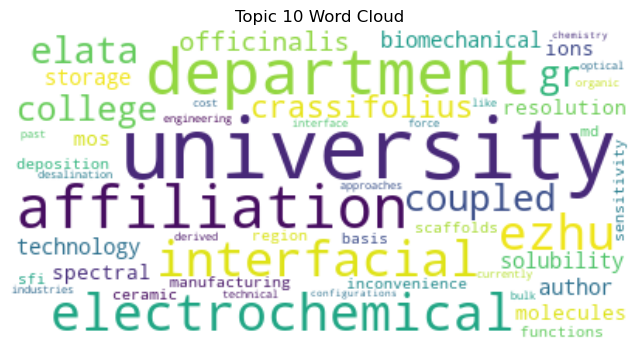

In [28]:
# Initialize a WordCloud object
wordcloud = WordCloud(background_color='white', max_words=50, contour_color='steelblue')

# Display word clouds for each topic
for topic_idx, topic in enumerate(lda.components_):
    word_freq = {feature_names[i]: topic[i] for i in topic.argsort()[:-51:-1]}  # Top 50 words for each topic
    wordcloud.generate_from_frequencies(word_freq)
    
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {topic_idx + 1} Word Cloud')
    plt.axis('off')
    plt.show()


In [32]:
# Compute cosine similarity matrix between topics
topic_similarity_matrix = cosine_similarity(lda.components_)

# Display the topic similarity matrix
print("Topic Similarity Matrix:")
print(topic_similarity_matrix)


Topic Similarity Matrix:
[[1.         0.41052566 0.43895522 0.27133332 0.51053063 0.47723899
  0.48218226 0.44677187 0.53655749 0.41452045]
 [0.41052566 1.         0.53803441 0.45822179 0.63053711 0.58991497
  0.59579567 0.54981656 0.6031153  0.56107144]
 [0.43895522 0.53803441 1.         0.44185368 0.65409263 0.61944347
  0.62761706 0.58327683 0.65357996 0.56740869]
 [0.27133332 0.45822179 0.44185368 1.         0.57287328 0.51331726
  0.50066982 0.45209139 0.53169805 0.40268348]
 [0.51053063 0.63053711 0.65409263 0.57287328 1.         0.70543912
  0.70009613 0.66306304 0.72697188 0.63375703]
 [0.47723899 0.58991497 0.61944347 0.51331726 0.70543912 1.
  0.66741766 0.64664631 0.69724151 0.58196163]
 [0.48218226 0.59579567 0.62761706 0.50066982 0.70009613 0.66741766
  1.         0.64558317 0.70627717 0.6036319 ]
 [0.44677187 0.54981656 0.58327683 0.45209139 0.66306304 0.64664631
  0.64558317 1.         0.65910612 0.57430059]
 [0.53655749 0.6031153  0.65357996 0.53169805 0.72697188 0.6972

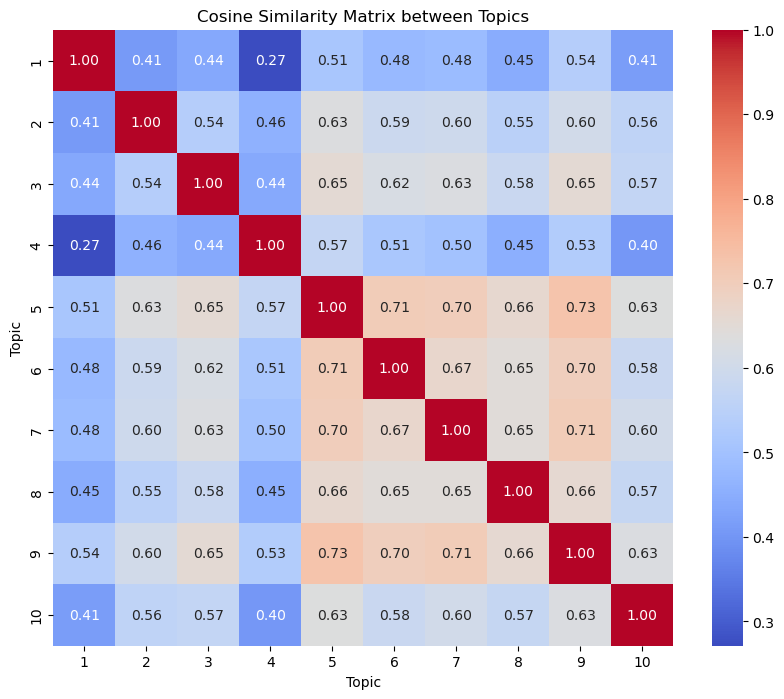

In [33]:
# Compute cosine similarity matrix between topics
topic_similarity_matrix = cosine_similarity(lda.components_)

# Create a heatmap of the cosine similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(topic_similarity_matrix, cmap='coolwarm', annot=True, fmt=".2f", xticklabels=range(1, len(topic_similarity_matrix) + 1), yticklabels=range(1, len(topic_similarity_matrix) + 1))
plt.title('Cosine Similarity Matrix between Topics')
plt.xlabel('Topic')
plt.ylabel('Topic')
plt.show()


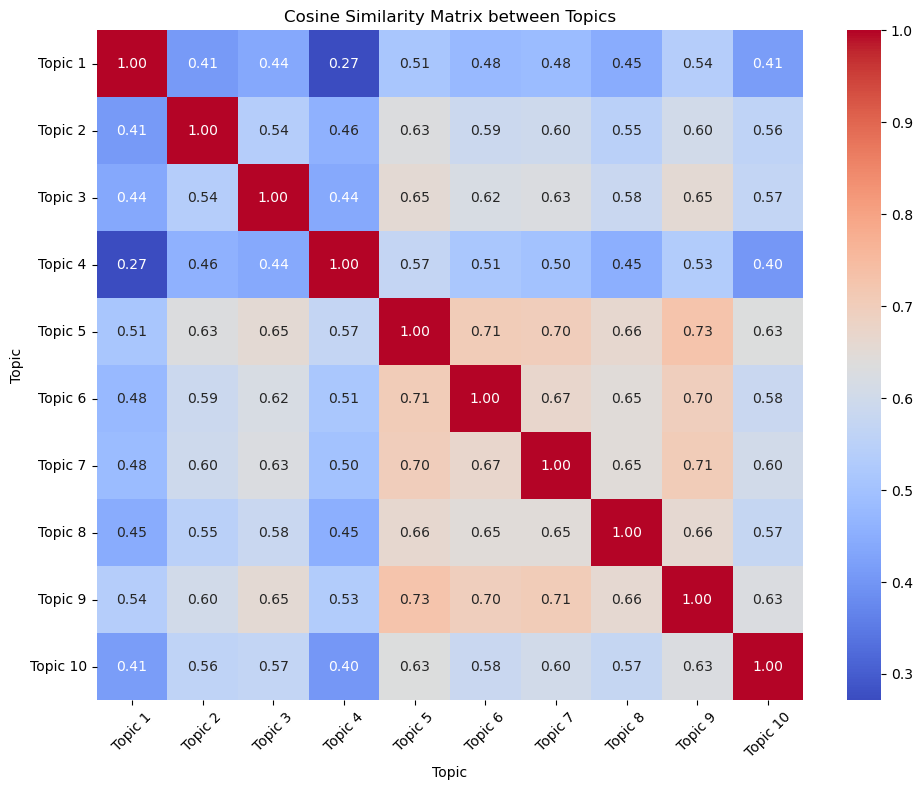

In [34]:
# Define topic labels
topic_labels = [f"Topic {i+1}" for i in range(len(lda.components_))]

# Compute cosine similarity matrix between topics
topic_similarity_matrix = cosine_similarity(lda.components_)

# Create a heatmap of the cosine similarity matrix with topic labels
plt.figure(figsize=(10, 8))
sns.heatmap(topic_similarity_matrix, cmap='coolwarm', annot=True, fmt=".2f", xticklabels=topic_labels, yticklabels=topic_labels)
plt.title('Cosine Similarity Matrix between Topics')
plt.xlabel('Topic')
plt.ylabel('Topic')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [36]:
#Document Topic Distributionb
Abstracts = data['Abstract'].tolist()

# Transform abstracts into topic distributions
doc_topic_distributions = lda.transform(tfidf_vectorizer.transform(abstracts))

# Display the document-topic distribution for the first document
print("Document-Topic Distribution for the first document:")
print(doc_topic_distributions[0])

# Display the document-topic distribution for all documents
print("\nDocument-Topic Distributions for all documents:")
for i, doc_topic_dist in enumerate(doc_topic_distributions):
    print(f"Document {i+1}:")
    print(doc_topic_dist)
    print()


Document-Topic Distribution for the first document:
[0.01661073 0.01661075 0.01661073 0.85050342 0.01661073 0.01661073
 0.01661073 0.01661073 0.01661073 0.01661073]

Document-Topic Distributions for all documents:
Document 1:
[0.01661073 0.01661075 0.01661073 0.85050342 0.01661073 0.01661073
 0.01661073 0.01661073 0.01661073 0.01661073]

Document 2:
[0.01729268 0.01723902 0.01722499 0.52819644 0.01722263 0.01722719
 0.33391388 0.0172377  0.01722284 0.01722262]

Document 3:
[0.0150354  0.01503532 0.0150276  0.59627004 0.01502766 0.01502909
 0.28347742 0.01503207 0.01503265 0.01503274]

Document 4:
[0.18840968 0.01610063 0.01610065 0.68278237 0.01610066 0.01610083
 0.01610102 0.01610063 0.01610292 0.01610062]

Document 5:
[0.01533844 0.01534014 0.01534703 0.64801304 0.01533746 0.01534001
 0.01533759 0.22926864 0.01533954 0.01533811]

Document 6:
[0.01975437 0.0197454  0.01975339 0.5031353  0.01974544 0.01974545
 0.01975158 0.01974643 0.01974688 0.33887575]

Document 7:
[0.02675752 0.0160

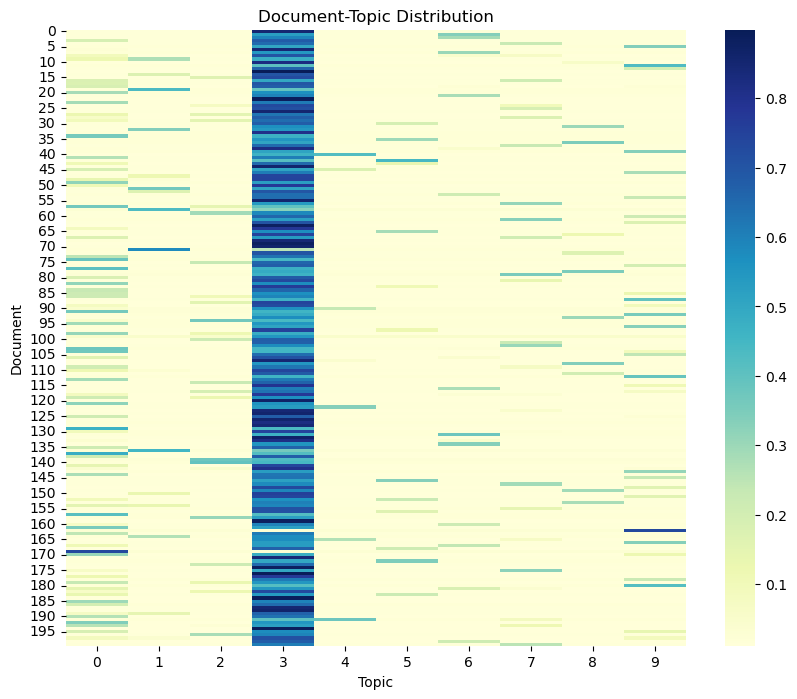

In [37]:
# Create a heatmap of the document-topic distribution
plt.figure(figsize=(10, 8))
sns.heatmap(doc_topic_distributions, cmap='YlGnBu', annot=False)
plt.title('Document-Topic Distribution')
plt.xlabel('Topic')
plt.ylabel('Document')
plt.show()


In [34]:
# Tokenize the text data
tokenized_text = [Abstract.split() for Abstract in data["Abstract"]]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

# Create document embeddings using Word2Vec
document_embeddings = []
for Abstract in tokenized_text:
    doc_embedding = sum([word2vec_model.wv[word] for word in Abstract]) / len(abstract)
    document_embeddings.append(doc_embedding)

# Perform topic modeling using Latent Dirichlet Allocation (LDA)
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(data['Abstract'])

lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(X_tfidf)

# Display the top words for each topic
feature_names = tfidf_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-11:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"Topic {topic_idx + 1}: {top_words}")

# Perform similarity search or other analysis using document embeddings if needed


Topic 1: ['species', 'plants', 'pharmacological', 'medicinal', 'uses', 'activities', 'plant', 'genus', 'traditional', 'antiinflammatory']
Topic 2: ['air', 'gun', 'genetic', 'cof', 'dependency', 'numerical', 'lattice', 'scheme', 'pdt', 'wt']
Topic 3: ['polarity', 'heat', 'pt', 'oh', 'scorzonera', 'tangchong', 'nv', 'min', 'complexes', 'atoms']
Topic 4: ['material', 'research', 'materials', 'applications', 'properties', 'review', 'science', 'study', 'potential', 'method']
Topic 5: ['pifir', 'koreanum', 'ggg', 'presented', 'toxicodendron', 'original', 'gtg', 'cough', 'trqi', 'wm']
Topic 6: ['maglev', 'model', 'requirements', 'defect', 'angle', 'proton', 'pf', 'values', 'crack', 'incontinence']
Topic 7: ['printing', 'film', 'storage', 'hericium', 'ygj', 'membrane', 'optical', 'actinidia', 'alginates', 'electrode']
Topic 8: ['nonlinear', 'electrochemical', 'medium', 'dataset', 'shape', 'core', 'electrode', 'scanning', 'signaling', 'experimental']
Topic 9: ['food', 'eating', 'available', 'co

In [55]:
# Assuming you have document_embeddings computed from Word2Vec
# document_embeddings = ...

# Perform clustering on document embeddings
num_clusters = 10  # Number of topics
kmeans = KMeans(n_clusters=num_clusters)
clusters = kmeans.fit_predict(document_embeddings)

# Assign labels to the clusters (topics)
topic_labels = {}
for cluster_index in range(num_clusters):
    # Extract top words or themes from documents within each cluster
    # Assign a label based on the extracted information
    # topic_labels[cluster_index] = ...

# Print topic labels
   for cluster_index, label in topic_labels.items():
    print(f"Topic {cluster_index + 1}: {label}")


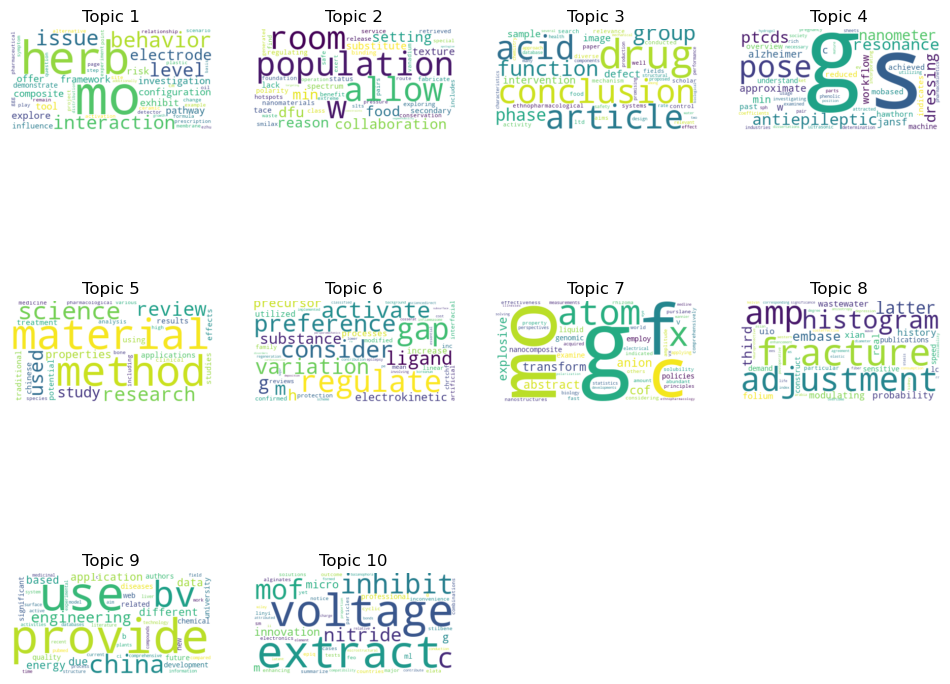

In [56]:
# Word cloud on Word2Vec embedding based topics 
# Define the number of clusters (topics)
num_clusters = 10

# Perform clustering on word vectors
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(word2vec_model.wv.vectors)

# Initialize a WordCloud object for each cluster
wordclouds = {}
for i in range(num_clusters):
    words = [word for word, label in zip(word2vec_model.wv.index_to_key, kmeans.labels_) if label == i]
    wordclouds[i] = WordCloud(background_color='white', max_words=50).generate(' '.join(words))

# Display word clouds for each cluster (topic)
plt.figure(figsize=(12, 10))
for i, (topic, wordcloud) in enumerate(wordclouds.items(), start=1):
    plt.subplot(3, 4, i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {topic + 1}')
    plt.axis('off')
plt.show()


In [37]:
#Topic Similarity
# Compute centroids of the clusters
centroids = kmeans.cluster_centers_

# Compute pairwise cosine similarity between centroids
topic_similarity_matrix = cosine_similarity(centroids)

# Display topic similarity matrix
print("Topic Similarity Matrix:")
print(topic_similarity_matrix)


Topic Similarity Matrix:
[[ 1.          0.44652584  0.17625841  0.59175617  0.40381804  0.26344216
   0.9950508   0.98807395  0.2366659   0.9967892 ]
 [ 0.44652584  1.0000001  -0.05388001  0.10289153  0.01337883 -0.02271226
   0.45240998  0.43532127 -0.00988744  0.45051157]
 [ 0.17625841 -0.05388001  1.         -0.01787831 -0.09692687 -0.1906047
   0.17983751  0.17938003 -0.15583928  0.17253824]
 [ 0.59175617  0.10289153 -0.01787831  1.0000002   0.0957388   0.01153571
   0.6004083   0.54605746  0.06034218  0.59010684]
 [ 0.40381804  0.01337883 -0.09692687  0.0957388   1.0000002  -0.08346909
   0.39007613  0.4011233  -0.08147785  0.4057307 ]
 [ 0.26344216 -0.02271226 -0.1906047   0.01153571 -0.08346909  1.
   0.25685427  0.26275253 -0.15325816  0.2594409 ]
 [ 0.9950508   0.45240998  0.17983751  0.6004083   0.39007613  0.25685427
   0.9999999   0.9858932   0.23860152  0.9956902 ]
 [ 0.98807395  0.43532127  0.17938003  0.54605746  0.4011233   0.26275253
   0.9858932   1.          0.247130

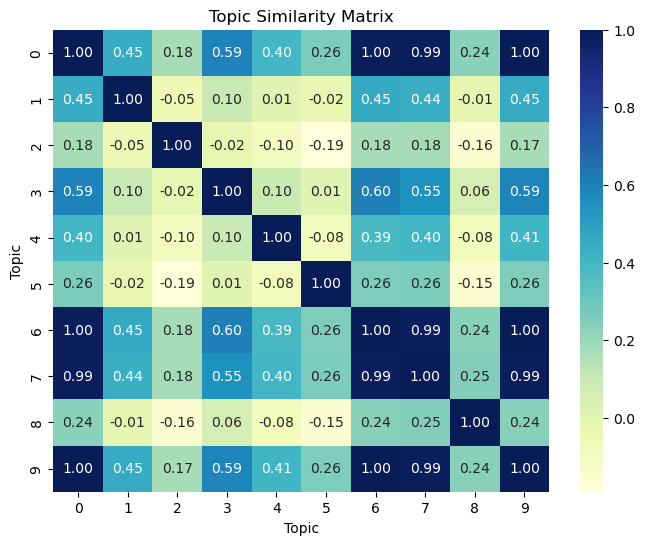

In [38]:
#Topic similarity visualization
centroids = kmeans.cluster_centers_

# Compute pairwise cosine similarity between centroids
topic_similarity_matrix = cosine_similarity(centroids)

# Create a heatmap of the topic similarity matrix
plt.figure(figsize=(8, 6))
sns.heatmap(topic_similarity_matrix, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Topic Similarity Matrix')
plt.xlabel('Topic')
plt.ylabel('Topic')
plt.show()


In [40]:
# Initialize an empty list to store document clusters
document_clusters = []

# Assign each document to the topic cluster with the highest representation in its word embeddings
for doc_embedding in document_embeddings:
    # Compute cosine similarity between the document embedding and centroids of topic clusters
    similarity_scores = cosine_similarity([doc_embedding], centroids)[0]
    # Find the index of the topic cluster with the highest similarity score
    cluster_index = similarity_scores.argmax()
    document_clusters.append(cluster_index)

# Add document clusters to the dataframe
data['cluster'] = document_clusters

# Display the documents in each cluster
for cluster_index in range(num_clusters):
    cluster_docs = data[data['cluster'] == cluster_index]['Abstract']
    print(f"Cluster {cluster_index + 1} ({len(cluster_docs)} documents):")
    for doc in cluster_docs:
        print("-", doc)
    print()


Cluster 1 (41 documents):
- new detectors future highenergy physics experiments operate unprecedented radiation dose rates condition requires improved radiation resistance detector equipment consequent development new materials particularly optical materials becomes crucial work optical components mean reflectors light absorbers light transmitters materials reflectors light transmitters needed detectors primarily collect transmit light scintillator pmt comes light absorbers required protect detector light environment work aims studying selected optical materials improved properties functional optical radiation resistance used new detectors large hadron collider lhc experiments light transmittance optical reflection thermal characteristics radiation resistance investigated evaluate proposed materials developed optical systems based siloxanes continue previous developments radiationresistant materials radiation detectors also report study several reflective materials light absorber intro

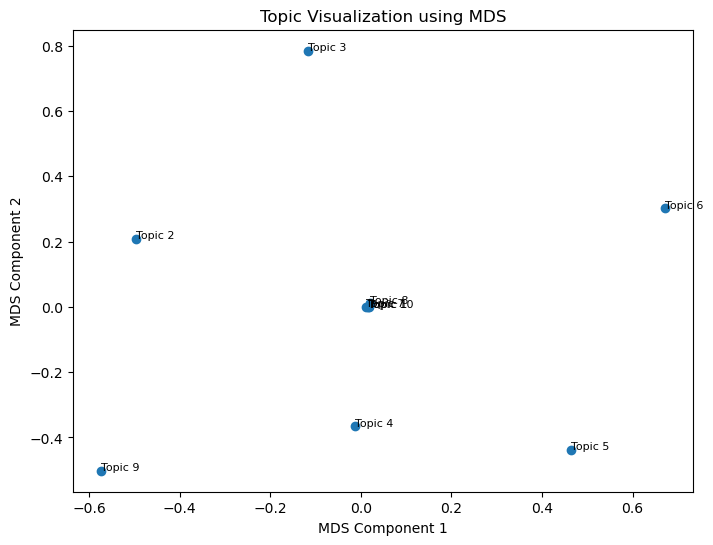

In [42]:
#Topic Visualization with MDS
# Initialize MDS with 2 components
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)

# Compute dissimilarity matrix from similarity matrix (1 - similarity)
dissimilarity_matrix = 1 - topic_similarity_matrix

# Perform dimensionality reduction
topics_2d_mds = mds.fit_transform(dissimilarity_matrix)

# Plot the topics in 2D space
plt.figure(figsize=(8, 6))
plt.scatter(topics_2d_mds[:, 0], topics_2d_mds[:, 1])
for i, (x, y) in enumerate(topics_2d_mds):
    plt.text(x, y, f"Topic {i+1}", fontsize=8)
plt.title('Topic Visualization using MDS')
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.show()


C:\Users\kaami\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\kaami\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


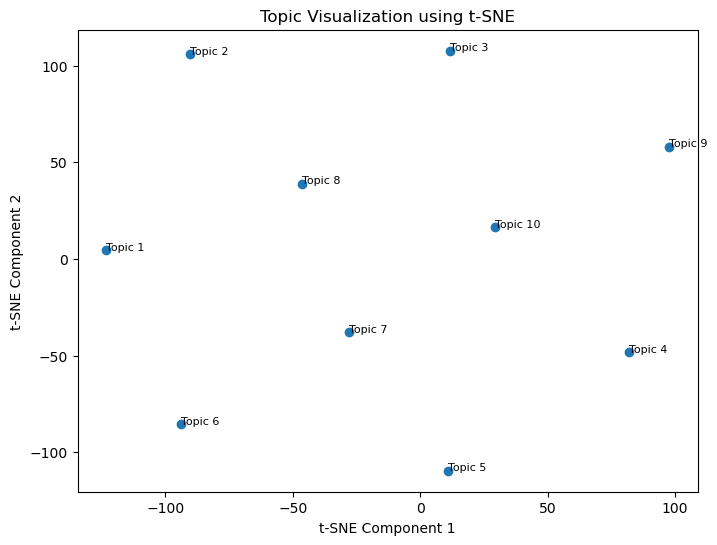

In [44]:
#Topic Visualization with t-SNE
# Initialize t-SNE with 2 components
tsne = TSNE(n_components=2, random_state=42)

# Perform dimensionality reduction
topics_2d_tsne = tsne.fit_transform(centroids)

# Plot the topics in 2D space
plt.figure(figsize=(8, 6))
plt.scatter(topics_2d_tsne[:, 0], topics_2d_tsne[:, 1])
for i, (x, y) in enumerate(topics_2d_tsne):
    plt.text(x, y, f"Topic {i+1}", fontsize=8)
plt.title('Topic Visualization using t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


In [58]:
#Topic Coherence

# Convert tokenized text to a list of strings
text = [' '.join(tokens) for tokens in tokenized_text]

# Create a dictionary and a corpus from the tokenized text
id2word = corpora.Dictionary(tokenized_text)
corpus = [id2word.doc2bow(tokens) for tokens in tokenized_text]

# Compute coherence score using the coherence model
coherence_model = CoherenceModel(model=lda, texts=tokenized_text, dictionary=id2word, coherence='c_v')
coherence_score = coherence_model.get_coherence()

print(f"Coherence Score: {coherence_score}")


NameError: name 'Corpora' is not defined

In [32]:
data["Abstract"][0]

'detailed investigation σhole halogen atom present nidoheteroboranes made employing quantum mechanical methods bromide hydroxyl groups incorporated exosubstituents nidoboranes potential bromide σhole compared electrostatic potential hydroxyl group counterpart presence carbon atom vertex different position system influences σhole hence binding abilities bromide substituted nidocarboranes less potential hence weaker binding ability compared closocounterparts binding affinity aliphatic found compared aromatic system presence solvent dampened electrostatic interactions apart neutral system binding capabilities charged nidoheteroboranes also studied results study useful several applications viz crystal engineering drug designing pharmaceuticals medicine material science energy storage devices etc inc'

In [111]:
import pandas as pd


# Combine all abstracts into a single list
abstracts = data['Abstract'].tolist()

# Initialize CountVectorizer to convert text to a matrix of token counts
vectorizer = CountVectorizer(max_features=1000, stop_words='english')

# Fit and transform the abstracts
X = vectorizer.fit_transform(abstracts)

# Initialize LDA with 10 topics
lda = LatentDirichletAllocation(n_components=10, random_state=42)

# Fit LDA to the abstracts
lda.fit(X)

# Display the top 10 words for each topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx + 1}:")
    top_words_idx = topic.argsort()[:-11:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(top_words)
    print()


Topic 1:
['material', 'university', 'science', 'study', 'authors', 'engineering', 'deformation', 'materials', 'process', 'department']

Topic 2:
['studies', 'included', 'study', 'results', 'health', 'use', 'signaling', 'ha', 'using', 'data']

Topic 3:
['energy', 'materials', 'storage', 'applications', 'hydrogen', 'density', 'high', 'carbon', 'science', 'material']

Topic 4:
['materials', 'properties', 'research', 'science', 'potential', 'review', 'material', 'applications', 'study', 'field']

Topic 5:
['materials', 'using', 'material', 'science', 'applications', 'method', 'methods', 'properties', 'images', 'high']

Topic 6:
['bone', 'tissue', 'engineering', 'chinese', 'defect', 'defects', 'animal', 'femoral', 'complexes', 'based']

Topic 7:
['science', 'materials', 'high', 'applications', 'material', 'pf', 'elsevier', 'research', 'used', 'analysis']

Topic 8:
['china', 'method', 'magnetic', 'university', 'nanoparticles', 'science', 'combined', 'engineering', 'maglev', 'accuracy']

Topi

In [10]:
import re
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

In [11]:
a = '<html> <body> <h1>My First Heading</h1> <p>My first paragraph.</p> </body></html>'
remove_html_tags(a)

'  My First Heading My first paragraph. '

In [12]:
data['review']=data['review'].apply(remove_html_tags)

In [13]:
print(data)

                                                  review sentiment
0      one of the other reviewers has mentioned that ...  positive
1      a wonderful little production. the filming tec...  positive
2      i thought this was a wonderful way to spend ti...  positive
3      basically there's a family where a little boy ...  negative
4      petter mattei's "love in the time of money" is...  positive
...                                                  ...       ...
49995  i thought this movie did a down right good job...  positive
49996  bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  i am a catholic taught in parochial elementary...  negative
49998  i'm going to have to disagree with the previou...  negative
49999  no one expects the star trek movies to be high...  negative

[50000 rows x 2 columns]


In [14]:
def remove_url(text):
    pattern = re.compile(r'https?://\s+|www.\S+')
    return pattern.sub(r'' , text)

In [15]:
text1 = 'check out my notebook https://www.kaggle.com/code/campusx/text-preprocessing/script'
text2 = 'check out my notbook http://localhost:8888/notebooks/Text%20Preprocessing.ipynb'
text3 = 'Google search here www.google.com'
text4 = 'For notebook click here: http://localhost:8888/notebooks/Text%20Preprocessing.ipynb'

In [16]:
print(remove_url(text1))
print(remove_url(text2))
print(remove_url(text3))
print(remove_url(text4))

check out my notebook https://
check out my notbook http://localhost:8888/notebooks/Text%20Preprocessing.ipynb
Google search here 
For notebook click here: http://localhost:8888/notebooks/Text%20Preprocessing.ipynb


In [17]:
remove_url(text4)

'For notebook click here: http://localhost:8888/notebooks/Text%20Preprocessing.ipynb'

### Removal of puntuation

In [18]:
import string, time
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
exclude = string.punctuation
def remove_pun(text):
    for i in exclude:
        text = text.replace(i, "")
        return text

In [20]:
text = 'string. with !punctuation'
remove_pun(text)

'string. with punctuation'

In [101]:
#this function is more faster then previeus one
exclude = string.punctuation
def remove_punc1(text):
    return text.translate(str.maketrans('','',exclude))


In [102]:
data["Abstract"] = data["Abstract"].apply(remove_punc1)

In [22]:
remove_punc1(text)

'string with punctuation'

In [23]:
data['review']=data['review'].apply(remove_punc1)

In [24]:
print(data)

                                                  review sentiment
0      one of the other reviewers has mentioned that ...  positive
1      a wonderful little production the filming tech...  positive
2      i thought this was a wonderful way to spend ti...  positive
3      basically theres a family where a little boy j...  negative
4      petter matteis love in the time of money is a ...  positive
...                                                  ...       ...
49995  i thought this movie did a down right good job...  positive
49996  bad plot bad dialogue bad acting idiotic direc...  negative
49997  i am a catholic taught in parochial elementary...  negative
49998  im going to have to disagree with the previous...  negative
49999  no one expects the star trek movies to be high...  negative

[50000 rows x 2 columns]


### Chat word Treatment

In [38]:
#def chat_conversation():
#    new_text = []
#    for w in text.split():
#        if w.upper() in chat_words:
 #           new_text.append(chat_words[w.upper()])
#        else:
 #           new_text.append(w)
  #  return " ".join(new_text)

### Speling Correction

In [41]:
#NLTK, spacy or textBlob
from textblob import TextBlob
incorrect_text = 'i am ikram wanna do text mining but nt able to du'
textblb = TextBlob(incorrect_text)
textblb.correct().string

'i am dram anna do text mining but it able to du'

### Removal of Stop words

In [103]:
from nltk.corpus import stopwords 

In [104]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [105]:
#this function takes more time to execute as compared to below one
def remove_stopwords(text):
    new_text = []
    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return ' '.join(x)

In [ ]:
data["Abstract"] = data["Abstract"].apply(re)

In [32]:
#this code taking more time
#data['review'] = data['review'].apply(remove_stopwords)

In [31]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources (you need to do this only once)
#nltk.download('punkt')
#nltk.download('stopwords')

# Function to remove stop words
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

# Apply stop words removal to DataFrame
data['review'] = data['review'].apply(remove_stopwords)

print(data)


                                                  review sentiment
0      one reviewers mentioned watching 1 oz episode ...  positive
1      wonderful little production filming technique ...  positive
2      thought wonderful way spend time hot summer we...  positive
3      basically theres family little boy jake thinks...  negative
4      petter matteis love time money visually stunni...  positive
...                                                  ...       ...
49995  thought movie right good job wasnt creative or...  positive
49996  bad plot bad dialogue bad acting idiotic direc...  negative
49997  catholic taught parochial elementary schools n...  negative
49998  im going disagree previous comment side maltin...  negative
49999  one expects star trek movies high art fans exp...  negative

[50000 rows x 2 columns]


### Handling Emojis 
there are two option for emojis handling, either remove or replace with 
the expression e.g. 😂 with (happy) etc

In [33]:
#Removing Emojis 
import pandas as pd
import re

# Sample DataFrame
data1 = {
    'review': ["This is a sample sentence with 😀 emoji.", "Another sentence with 😊 and 😎 emojis."]
}
df = pd.DataFrame(data1)

# Function to remove emojis
def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Apply emoji removal to DataFrame
df['review'] = df['review'].apply(remove_emojis)

print(df)


                                   review
0  This is a sample sentence with  emoji.
1     Another sentence with  and  emojis.


In [36]:
# replacing emoji
import emoji
print(emoji.demojize("🙏 for your cooperation"))

:folded_hands: for your cooperation


### Tokenization
breaking text documents into smaller parts paragraph into sentences and 
sentences into words

In [37]:
#word tokenization with split()
sent1 = "I am going to Islamabad"
sent1.split()

['I', 'am', 'going', 'to', 'Islamabad']

In [39]:
# Sentence tokenization with split()
sent2 = "I am going to Islamabad. I will stay there for 3 days. later will will came bak"
sent2.split('.')

['I am going to Islamabad',
 ' I will stay there for 3 days',
 ' later will will came bak']

In [40]:
# using Regular expression
sent3 = "I am going to Islamabad!"
tokens = re.findall("[\w']+", sent3)
tokens

['I', 'am', 'going', 'to', 'Islamabad']

In [41]:
text = """where from you?
i am form Pakistna. and you? i am Austrailian! as well Pakistani actualy 
dual"""
sentences = re.compile('[.!?]').split(text)
sentences


['where from you',
 '\ni am form Pakistna',
 ' and you',
 ' i am Austrailian',
 ' as well Pakistani actualy \ndual']

### Tokenization with NLTK

In [42]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [43]:
sent1 ="I am going to Islamabad!"
word_tokenize(sent1)

['I', 'am', 'going', 'to', 'Islamabad', '!']

In [44]:
text = """where from you?
i am form Pakistna. and you? i am Austrailian! as well Pakistani actualy 
dual"""
sent_tokenize(text)

['where from you?',
 'i am form Pakistna.',
 'and you?',
 'i am Austrailian!',
 'as well Pakistani actualy \ndual']

### Tokinization with spacy

In [50]:
import spacy
nlp = spacy.load('en_core_web_lg')
#nlp = spacy.load('en_core_web_sm')

In [51]:
doc1 = nlp(text)

In [52]:
print(doc1)

where from you?
i am form Pakistna. and you? i am Austrailian! as well Pakistani actualy 
dual


In [53]:
for token in doc1:
    print(token)

where
from
you
?


i
am
form
Pakistna
.
and
you
?
i
am
Austrailian
!
as
well
Pakistani
actualy


dual


### Stemming

In [2]:
# to reduce inflection in english language. 
#setming mostly used in Information retrieval system
#Poter stemmer for englis
#snowball stemmer for other languages

from nltk.stem.porter import PorterStemmer 

In [4]:
ps = PorterStemmer()
def stem_words(text):
    return" ".join([ps.stem(word) for word in text.split()])

In [5]:
sample = 'walk waks walking walks'
stem_words(sample)

'walk wak walk walk'

### Lemmatization
Lemmatizaion, unlike Stemming, reduce the inflected words properly ensuring the root word belong to the language. In Lemmatization root word is called Lemma. 

In [6]:
#wordnet Lemmatizer lexical dictionary
import nltk
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [11]:
sentence = "He was running and eating at same time. he has bad habit of swimming after playing long hours in the Sun."
punctuations = "?:!.,;"
sentence_words = nltk.word_tokenize(sentence)
for word in sentence_words:
    if word in punctuations:
        sentence_words.remove(word)
sentence_words
print("{0:20}{1:20}".format("Word", "Lemma"))
for word in sentence_words:
    print("{0:20}{1:20}".format(word, wordnet_lemmatizer.lemmatize(word, pos = 'v')))

Word                Lemma               
He                  He                  
was                 be                  
running             run                 
and                 and                 
eating              eat                 
at                  at                  
same                same                
time                time                
he                  he                  
has                 have                
bad                 bad                 
habit               habit               
of                  of                  
swimming            swim                
after               after               
playing             play                
long                long                
hours               hours               
in                  in                  
the                 the                 
Sun                 Sun                 


In [ ]:
#Assignment tmbdb scrap 3 columns moview name,descrtiption and genere and 
#creation of dataset 
# 2. preprocessing on descrtiption 